In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [12]:
data = pd.read_csv('winequality-red.csv')

In [13]:
df = data.copy()

In [14]:
num_df = df.select_dtypes(include='number')

In [15]:
corr = df.corr(numeric_only=True)

In [16]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

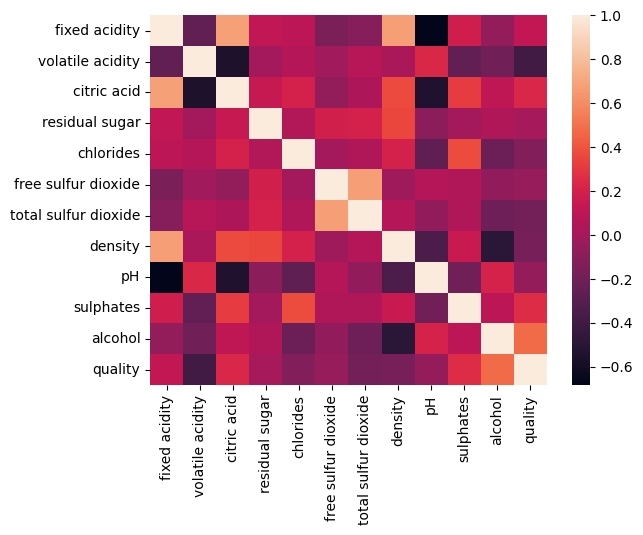

In [17]:
plt.Figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True))

#volatile acidity

In [18]:
corr_value = df['alcohol'].corr(df['quality'])
corr_value

np.float64(0.4761663240011362)

Text(0.5, 1.0, 'relation bettwen alcohol and quality')

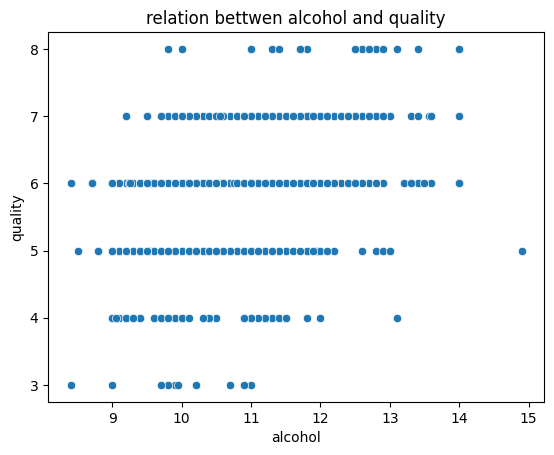

In [21]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data=df,x='alcohol',y='quality')
plt.title('relation bettwen alcohol and quality')

In [24]:
fig1 = px.scatter(df,x ='quality',y='alcohol',title='relation between alcohol and quality')

In [23]:
fig1

Do higher alcohol levels generally lead to higher quality ratings?
 no

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
corr_volatile = df['volatile acidity'].corr(df['quality'])

In [27]:
corr_volatile

np.float64(-0.39055778026400734)

How does volatile acidity affect wine quality?
negaive relationship

Text(0.5, 1.0, 'relationship between residual sugr and quality')

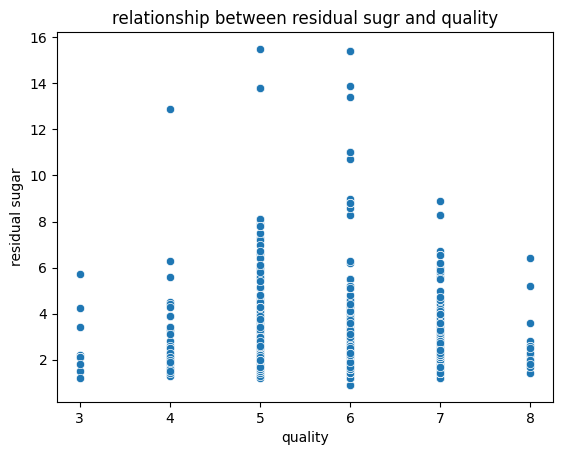

In [28]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data=df,x='quality',y='residual sugar')
plt.title('relationship between residual sugr and quality')

In [29]:
corr_sugar = df['residual sugar'].corr(df['quality'])

In [30]:
corr_sugar

np.float64(0.013731637340066277)

Is there any noticeable relationship between residual sugar and quality?
 there is no relation ship between them

alcohol_acidity_group
High Alcohol + Low Acidity     6.138833
High Alcohol + High Acidity    5.666667
Low Alcohol + Low Acidity      5.476489
Low Alcohol + High Acidity     5.199161
Name: quality, dtype: float64


C:\Users\seifa\AppData\Local\Temp\ipykernel_12076\1943621557.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




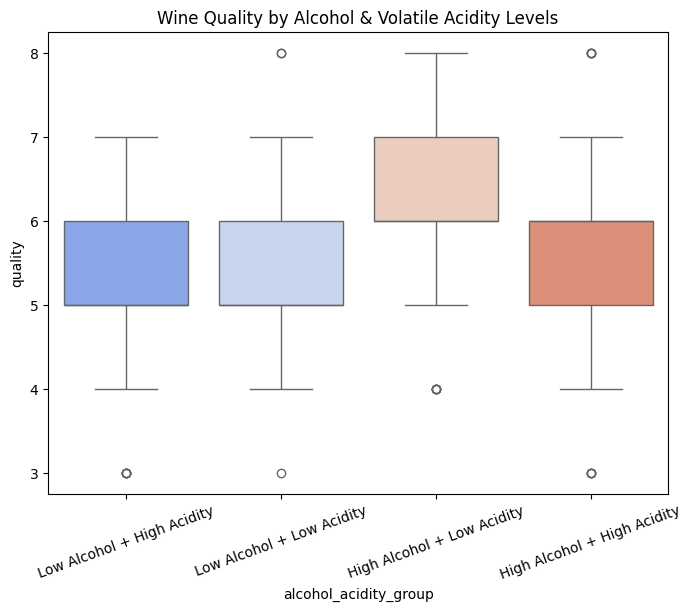

In [31]:

alcohol_median = df['alcohol'].median()
volatile_median = df['volatile acidity'].median()

def alcohol_acidity_group(row):
    if row['alcohol'] >= alcohol_median and row['volatile acidity'] <= volatile_median:
        return 'High Alcohol + Low Acidity'
    elif row['alcohol'] >= alcohol_median and row['volatile acidity'] > volatile_median:
        return 'High Alcohol + High Acidity'
    elif row['alcohol'] < alcohol_median and row['volatile acidity'] <= volatile_median:
        return 'Low Alcohol + Low Acidity'
    else:
        return 'Low Alcohol + High Acidity'

df['alcohol_acidity_group'] = df.apply(alcohol_acidity_group, axis=1)

group_quality = df.groupby('alcohol_acidity_group')['quality'].mean().sort_values(ascending=False)
print(group_quality)

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='alcohol_acidity_group', y='quality', palette='coolwarm')
plt.title("Wine Quality by Alcohol & Volatile Acidity Levels")
plt.xticks(rotation=20)
plt.show()


In [32]:
corr_sulphates = df['sulphates'].corr(df['alcohol'])

In [33]:
corr_sulphates

np.float64(0.09359475041046737)

In [36]:
fig2 = px.scatter(df,x='sulphates',y='alcohol')

In [37]:
fig2

Do wines with higher sulphates tend to have higher alcohol content?
 no

In [40]:
high_quality = df[df['quality']>7]

In [41]:
average_pH = high_quality['pH'].mean()


In [42]:
average_pH

np.float64(3.2672222222222222)

In [43]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_acidity_group'],
      dtype='object')

In [44]:
corr_density = df['density'].corr(df['quality'])

In [45]:
corr_density

np.float64(-0.17491922778334884)

In [46]:
fig3 = px.scatter(df,x='quality',y='density',title='relation between density and quality')

In [47]:
fig3

Are wines with lower density generally of better quality?
 nigative relationship